# Algoritmo DBSCAN

## Link para o notebook principal

[Notebook principal - main.ipynb](./main.ipynb)

## Tabela de Índices

- [Importando Pacotes e Bibliotecas](#importando-os-pacotes-e-bibliotecas)
- [Importando Datasets Tratados](#importando-os-datasets-tratados)
- [Preparando os Hiper-parâmetros](#preparando-os-hiper-parametros)
- [Usando o Algoritmo](#utilizando-o-algoritmo-dbscan)

## Importando os pacotes e bibliotecas

In [1]:
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from matplotlib import pyplot as plt
from utils import parametros
from models import dbscan
import seaborn as sns
import pandas as pd
import numpy as np

## Importando os datasets tratados

In [2]:
df_iris_raw = pd.read_csv("./databases/raw/Iris.csv", sep = ",", index_col = "Id")
df_titanic_processed = pd.read_pickle("./databases/processed/titanic_processado.pkl")
df_coracao_processed = pd.read_pickle("./databases/processed/coracao_processado.pkl")

## Preparando os hiper-parametros

### Separando os **X** e **y** de todos os datasets

In [3]:
min_max_scaler = MinMaxScaler()

X_iris = df_iris_raw.drop(columns = ["Species"]).values
y_iris = df_iris_raw["Species"]

X_titanic = min_max_scaler.fit_transform(df_titanic_processed.drop(columns = ["Survived", "Name"]).values)
y_titanic = df_titanic_processed["Survived"]

X_coracao = min_max_scaler.fit_transform(df_coracao_processed.drop(columns = ["target"]).values)
y_coracao = df_coracao_processed["target"]

### Lendo os hiper-parametros de um arquivo e os salvando em uma classe

In [4]:
hiper_parametros_dbscan = parametros.ParametrosDBSCAN(path_arquivo_hiperparametros = "./hiperparametros/hiperparametros_dbscan.txt")
tamanho_teste = 0.6

## Utilizando o algoritmo DBSCAN

In [5]:
soma_dos_quadrados_iris = []
soma_dos_quadrados_titanic = []
soma_dos_quadrados_coracao = []

for i in range(1, 14):
    Dbscan = dbscan.Bdscan(epocas = i,
                           peso_minimo = hiper_parametros_dbscan.getPeso_minimo(),
                           metrica = hiper_parametros_dbscan.getMetrica(),
                           parametros_metrica = hiper_parametros_dbscan.getParametros_metrica(),
                           algoritmo = hiper_parametros_dbscan.getAlgoritmo(),
                           tamanho_folha = hiper_parametros_dbscan.getTamanho_folha(),
                           metrica_minkowski = hiper_parametros_dbscan.getMetricaMinkowski(),
                           nro_threads = hiper_parametros_dbscan.getNro_threads())
    
    Dbscan.fit(X_iris)
    soma_dos_quadrados_iris.append(Dbscan.getDistanciaAoQuadrado())
    
    Dbscan = dbscan.Bdscan(epocas = i,
                           peso_minimo = hiper_parametros_dbscan.getPeso_minimo(),
                           metrica = hiper_parametros_dbscan.getMetrica(),
                           parametros_metrica = hiper_parametros_dbscan.getParametros_metrica(),
                           algoritmo = hiper_parametros_dbscan.getAlgoritmo(),
                           tamanho_folha = hiper_parametros_dbscan.getTamanho_folha(),
                           metrica_minkowski = hiper_parametros_dbscan.getMetricaMinkowski(),
                           nro_threads = hiper_parametros_dbscan.getNro_threads())
    Dbscan.fit(X_titanic)
    soma_dos_quadrados_titanic.append(Dbscan.getDistanciaAoQuadrado())
    
    Dbscan = dbscan.Bdscan(epocas = i,
                           peso_minimo = hiper_parametros_dbscan.getPeso_minimo(),
                           metrica = hiper_parametros_dbscan.getMetrica(),
                           parametros_metrica = hiper_parametros_dbscan.getParametros_metrica(),
                           algoritmo = hiper_parametros_dbscan.getAlgoritmo(),
                           tamanho_folha = hiper_parametros_dbscan.getTamanho_folha(),
                           metrica_minkowski = hiper_parametros_dbscan.getMetricaMinkowski(),
                           nro_threads = hiper_parametros_dbscan.getNro_threads())
    Dbscan.fit(X_coracao)
    soma_dos_quadrados_coracao.append(Dbscan.getDistanciaAoQuadrado())

### Imprimindo o resultado dos testes

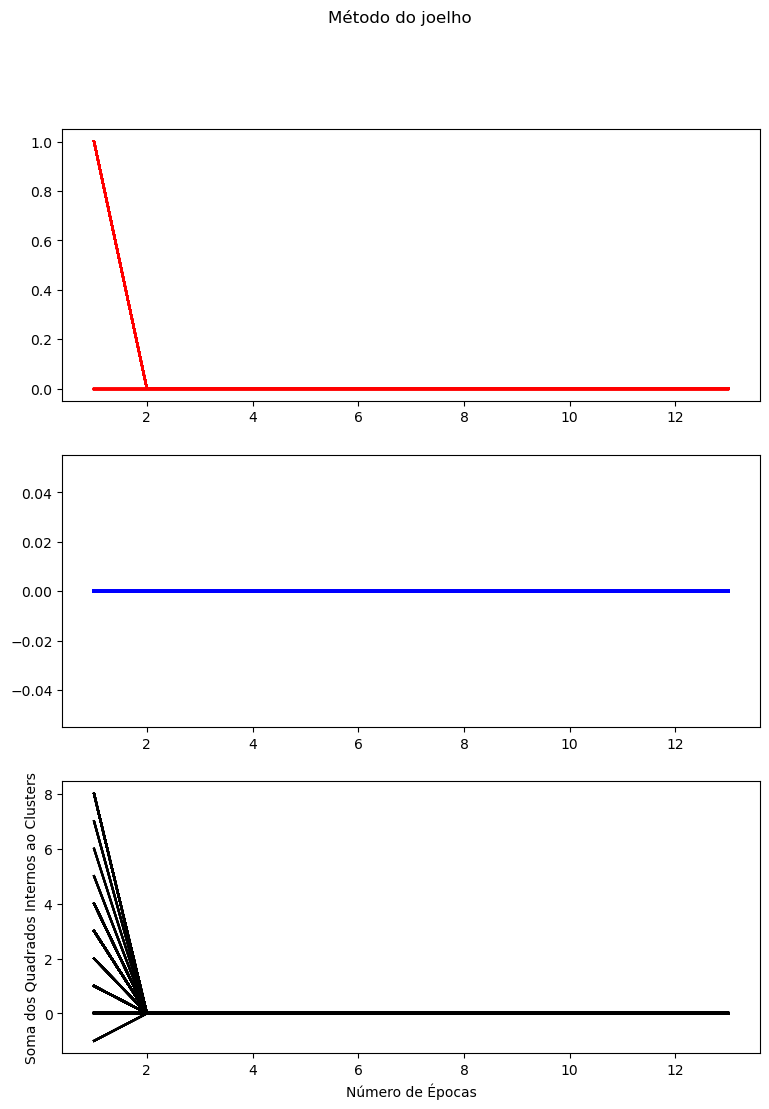

In [6]:
figura, eixos = plt.subplots(3, 1, figsize = (9, 12))

plt.suptitle("Método do joelho")
plt.xlabel("Número de Épocas")
plt.ylabel("Soma dos Quadrados Internos ao Clusters")

eixos[0].plot(range(1, 14), soma_dos_quadrados_iris, color = "red")
eixos[1].plot(range(1, 14), soma_dos_quadrados_titanic, color = "blue")
eixos[2].plot(range(1, 14), soma_dos_quadrados_coracao, color = "black")

plt.show()

O número de clusters escolhido é:
- `3` para o dataset `Iris`;
- `2` para o dataset `Titanic`;
- `2` para o dataset `Coração`.

### Implementando a clusterização

#### Dataset Iris

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, train_size = 0.65, random_state = hiper_parametros_dbscan.getSemente_randomica())
nro_epocas = 3

In [8]:
dbscan_iris = dbscan.Bdscan(epocas = nro_epocas,
                            peso_minimo = hiper_parametros_dbscan.getPeso_minimo(),
                            metrica = hiper_parametros_dbscan.getMetrica(),
                            parametros_metrica = hiper_parametros_dbscan.getParametros_metrica(),
                            algoritmo = hiper_parametros_dbscan.getAlgoritmo(),
                            tamanho_folha = hiper_parametros_dbscan.getTamanho_folha(),
                            metrica_minkowski = hiper_parametros_dbscan.getMetricaMinkowski(),
                            nro_threads = hiper_parametros_dbscan.getNro_threads())
dbscan_iris.fit(X_train)
y_dbscan_iris = dbscan_iris.getDistanciaAoQuadrado()

In [9]:
qtd_clusters_ = len(set(y_dbscan_iris)) - (1 if -1 in y_dbscan_iris else 0)
nro_ruidos_ = list(y_dbscan_iris).count(-1)

print("Númber estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


##### Visualizando os clusters

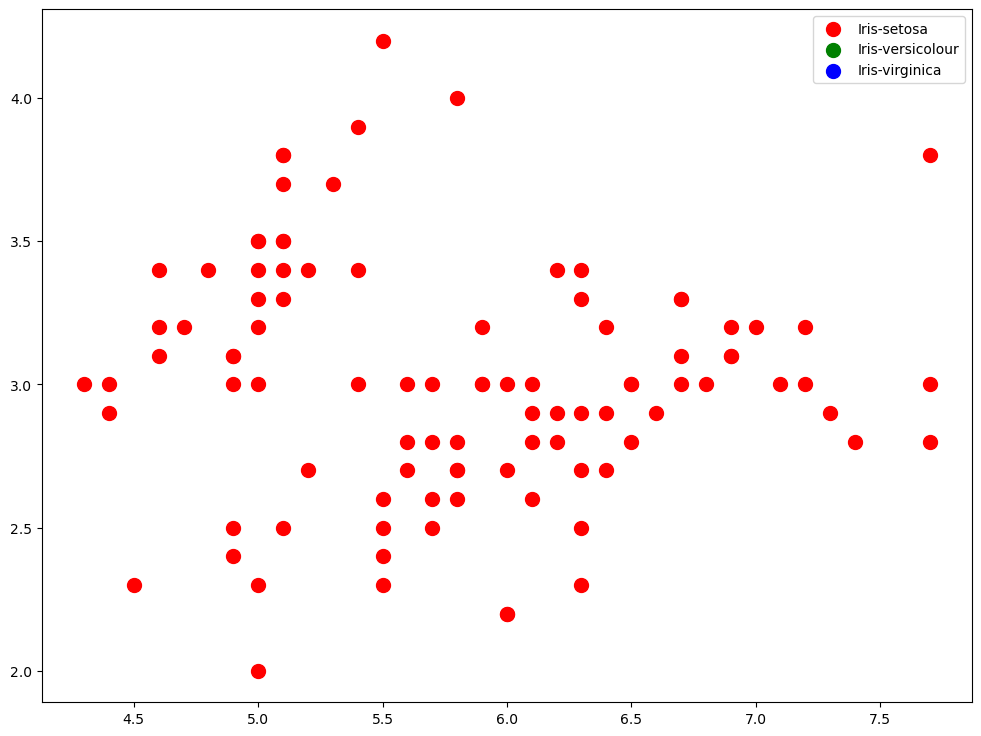

In [10]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_train[y_dbscan_iris == 0, 0], X_train[y_dbscan_iris == 0, 1], s = 100, c = "red", label = "Iris-setosa")
plt.scatter(X_train[y_dbscan_iris == 1, 0], X_train[y_dbscan_iris == 1, 1], s = 100, c = "green", label = "Iris-versicolour")
plt.scatter(X_train[y_dbscan_iris == 2, 0], X_train[y_dbscan_iris == 2, 1], s = 100, c = "blue", label = "Iris-virginica")

plt.legend()
plt.show()

##### Avaliação do método - Dataset Iris

In [11]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
if qtd_clusters_ > 1:
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(X_train, dbscan_iris.getDistanciaAoQuadrado(), metric = metrica))

    davies_bouldin = davies_bouldin_score(X_train, dbscan_iris.getDistanciaAoQuadrado())
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

In [12]:
print("Acurácia: ", accuracy_score(y_true = y_train, y_pred = y_dbscan_iris))

Acurácia:  0.0


##### Impressão dos erros residuais - Dataset Iris

In [13]:
np.unique(y_train)

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

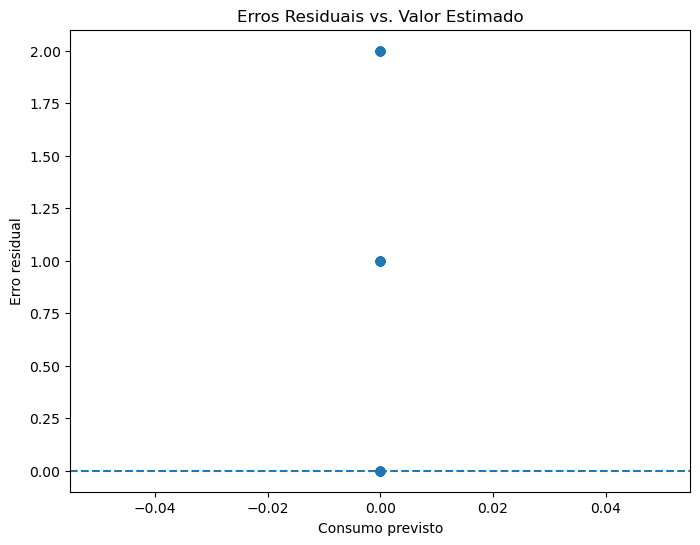

In [14]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_train.map({"Iris-setosa" : 0, "Iris-versicolor": 1, "Iris-virginica": 2}).astype("uint8") - y_dbscan_iris

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_dbscan_iris, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()

#### Dataset Titanic

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_titanic, y_titanic, train_size = 0.65, random_state = hiper_parametros_dbscan.getSemente_randomica())
nro_epocas = 2

In [16]:
dbscan_titanic = dbscan.Bdscan(epocas = nro_epocas,
                               peso_minimo = hiper_parametros_dbscan.getPeso_minimo(),
                               metrica = hiper_parametros_dbscan.getMetrica(),
                               parametros_metrica = hiper_parametros_dbscan.getParametros_metrica(),
                               algoritmo = hiper_parametros_dbscan.getAlgoritmo(),
                               tamanho_folha = hiper_parametros_dbscan.getTamanho_folha(),
                               metrica_minkowski = hiper_parametros_dbscan.getMetricaMinkowski(),
                               nro_threads = hiper_parametros_dbscan.getNro_threads())
dbscan_titanic.fit(X_train)
y_dbscan_titanic = dbscan_titanic.getDistanciaAoQuadrado()

In [17]:
qtd_clusters_ = len(set(y_dbscan_titanic)) - (1 if -1 in y_dbscan_titanic else 0)
nro_ruidos_ = list(y_dbscan_titanic).count(-1)

print("Númber estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


##### Visualizando os clusters

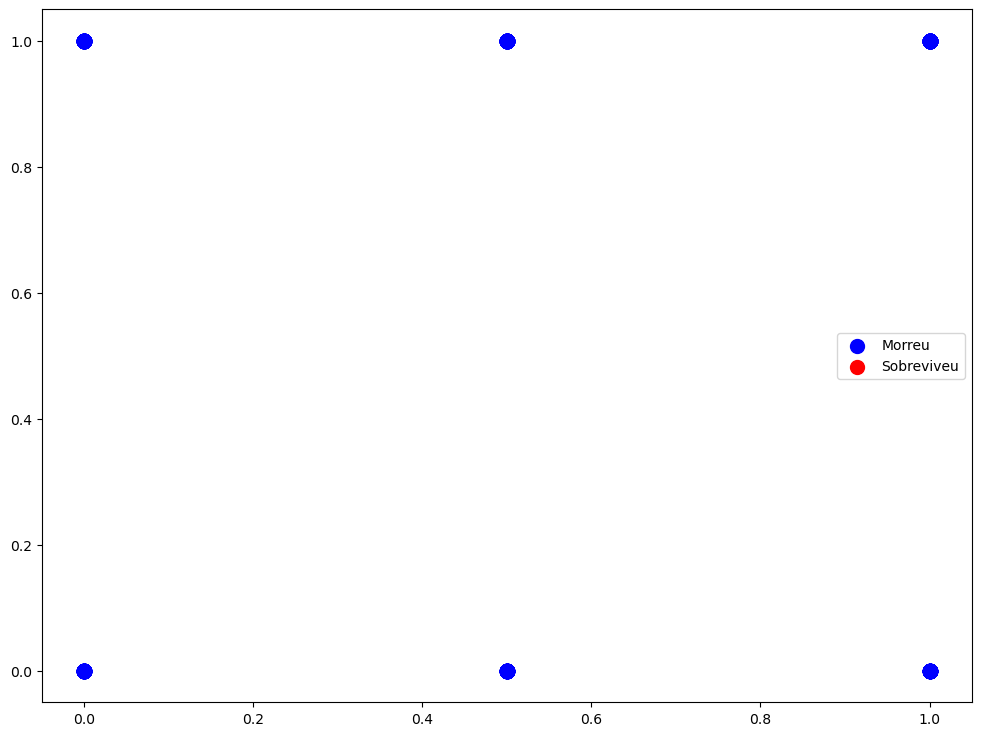

In [18]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_train[y_dbscan_titanic == 0, 0], X_train[y_dbscan_titanic == 0, 1], s = 100, c = "blue", label = "Morreu")
plt.scatter(X_train[y_dbscan_titanic == 1, 0], X_train[y_dbscan_titanic == 1, 1], s = 100, c = "red", label = "Sobreviveu")

plt.legend()
plt.show()

##### Avaliação do método - Dataset Titanic

In [19]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
if qtd_clusters_ > 1:
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(X_train, dbscan_titanic.getDistanciaAoQuadrado(), metric = metrica))

    davies_bouldin = davies_bouldin_score(X_train, dbscan_titanic.getDistanciaAoQuadrado())
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

In [20]:
print("Acurácia: ", accuracy_score(y_true = y_train, y_pred = y_dbscan_titanic))

Acurácia:  0.5569487983281086


##### Impressão dos erros residuais - Dataset Titanic

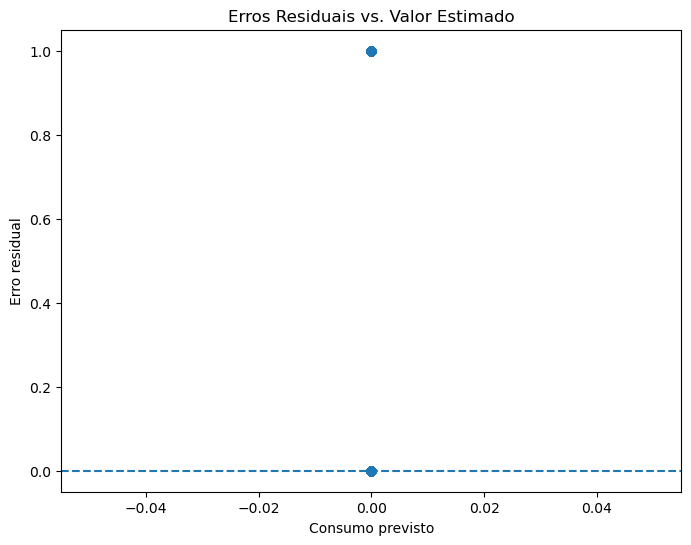

In [21]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_train.astype("uint8") - y_dbscan_titanic

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_dbscan_titanic, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()

#### Dataset Coração

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_coracao, y_coracao, train_size = 0.65, random_state = hiper_parametros_dbscan.getSemente_randomica())
nro_epocas = 2

In [23]:
dbscan_coracao = dbscan.Bdscan(epocas = nro_epocas,
                               peso_minimo = hiper_parametros_dbscan.getPeso_minimo(),
                               metrica = hiper_parametros_dbscan.getMetrica(),
                               parametros_metrica = hiper_parametros_dbscan.getParametros_metrica(),
                               algoritmo = hiper_parametros_dbscan.getAlgoritmo(),
                               tamanho_folha = hiper_parametros_dbscan.getTamanho_folha(),
                               metrica_minkowski = hiper_parametros_dbscan.getMetricaMinkowski(),
                               nro_threads = hiper_parametros_dbscan.getNro_threads())
dbscan_coracao.fit(X_train)
y_dbscan_coracao = dbscan_coracao.getDistanciaAoQuadrado()

In [24]:
qtd_clusters_ = len(set(y_dbscan_coracao)) - (1 if -1 in y_dbscan_coracao else 0)
nro_ruidos_ = list(y_dbscan_coracao).count(-1)

print("Númber estimado  de clusteres: %d" % qtd_clusters_)
print("Número estimado de pontos considerados ruídos: %d" % nro_ruidos_)

Númber estimado  de clusteres: 1
Número estimado de pontos considerados ruídos: 0


##### Visualizando os clusters

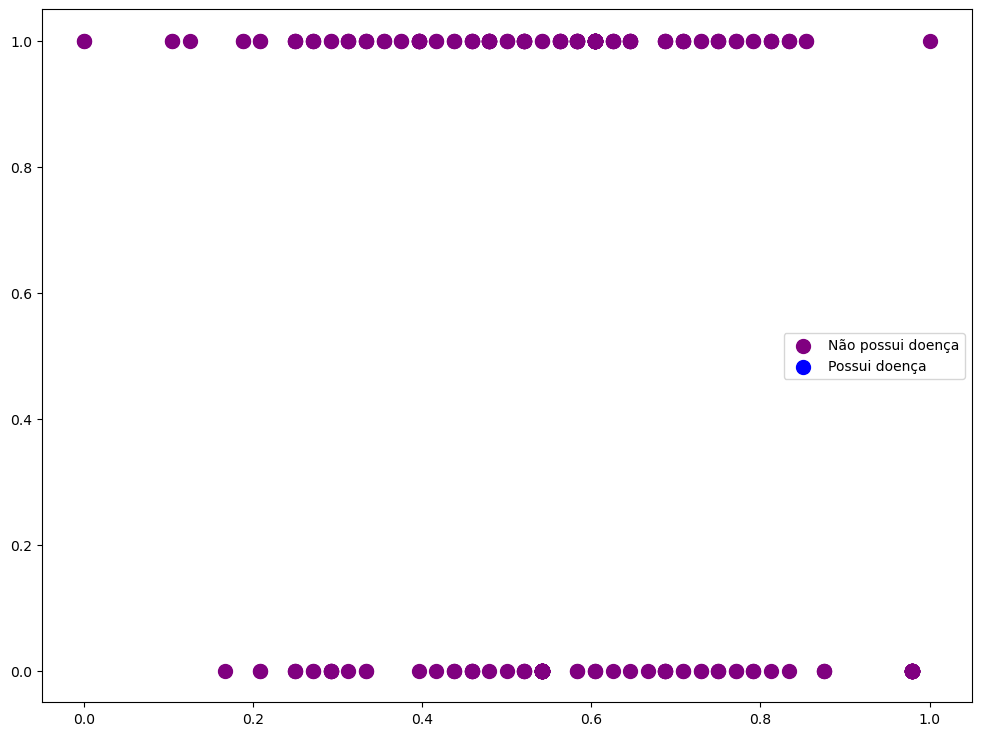

In [25]:
plt.figure(figsize = (12, 9))

### OS PONTOS GERAIS
plt.scatter(X_train[y_dbscan_coracao == 0, 0], X_train[y_dbscan_coracao == 0, 1], s = 100, c = "purple", label = "Não possui doença")
plt.scatter(X_train[y_dbscan_coracao == 1, 0], X_train[y_dbscan_coracao == 1, 1], s = 100, c = "blue", label = "Possui doença")

plt.legend()
plt.show()

##### Avaliação do método - Dataset Coração

In [26]:
# POSSIVEIS METRICAS
# ‘cityblock’,
# ‘cosine’,
# ‘euclidean’,
# ‘l1’,
# ‘l2’,
# ‘manhattan’
if qtd_clusters_ > 1:
    silhouette = []

    for metrica in ["cityblock", "cosine", "euclidean", "l1", "l2", "manhattan"]:
        silhouette.append(silhouette_score(X_train, dbscan_coracao.getDistanciaAoQuadrado(), metric = metrica))

    davies_bouldin = davies_bouldin_score(X_train, dbscan_coracao.getDistanciaAoQuadrado())
    print("SILHOUETTE SCORE: ", silhouette, end = "\n")
    print("DAVIS-BOULDIN SCORE: ", davies_bouldin, end = "\n")

In [27]:
print("Acurácia: ", accuracy_score(y_true = y_train, y_pred = y_dbscan_coracao))

Acurácia:  0.5743243243243243


##### Impressão dos erros residuais - Dataset Coração

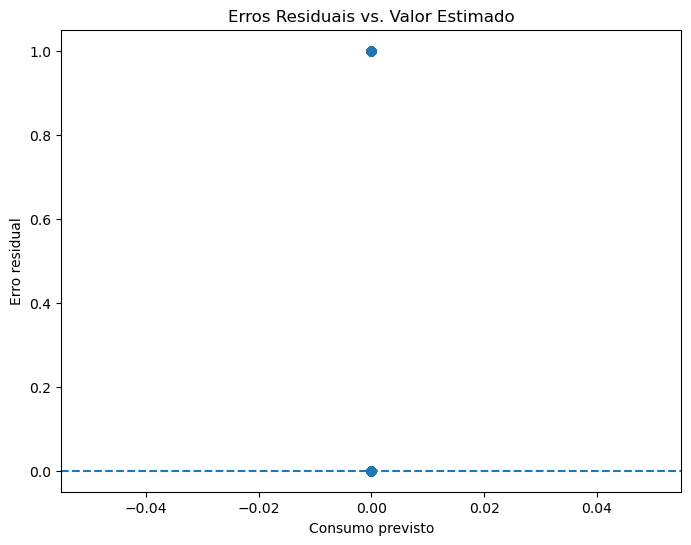

In [28]:
figura = plt.figure(figsize = (8, 6))

erros_residuais = y_train.astype("uint8") - y_dbscan_coracao

plt.title("Erros Residuais vs. Valor Estimado")
plt.scatter(y_dbscan_coracao, erros_residuais)
plt.axhline(y = 0, linestyle = "--")
plt.xlabel("Consumo previsto")
plt.ylabel("Erro residual")

plt.show()